# Simply Setting vs Using the Shared Partition

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

# Global memory paths
empty_partition_path = "GlobalEqual"
empty_paths = []

# List of all files in the directory
for filename in os.listdir(empty_partition_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(empty_partition_path, filename)
  if os.path.isfile(file_path):
      empty_paths.append(file_path)
empty_paths = sorted(empty_paths)


# Shared paths
shared_directory_path = "SetCapacityData"
shared_paths = []

# List of all files in the directory
for filename in os.listdir(shared_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(shared_directory_path, filename)
  if os.path.isfile(file_path):
      shared_paths.append(file_path)
shared_paths = sorted(shared_paths)

# No memory trial
clean_path = 'CleanCache/xavierNoMemory1.csv'

# =================================
# Read in the data
# =================================
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier
import numpy as np

def read_ivls(paths, single=False):
  if single:
    data, ivls = data_loader(singlePath=paths, single=True)
    return  np.array(ivls) / 1000
  ivls_array = []
  for path in paths:
    data, ivls = data_loader(singlePath=path, single=True)
    # Convert to microseconds
    ivls = np.array(ivls) / 1000
    ivls_array.append(ivls)
  return ivls_array

# Load equivalent global memory trials
empty_ivls = read_ivls(empty_paths)

# Load shared memory trials
shared_ivls = read_ivls(shared_paths)

# Load clean cache intervals
clean_ivls = read_ivls(clean_path, single=True)

# Verify paths
empty_paths, shared_paths

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


(['GlobalEqual/AxavierGlobalEqualOne12ths.csv',
  'GlobalEqual/BxavierGlobalEqualTwo12ths.csv',
  'GlobalEqual/CxavierGlobalEqualThree12ths.csv',
  'GlobalEqual/DxavierGlobalEqualFour12ths.csv',
  'GlobalEqual/ExavierGlobalEqualFive12ths.csv',
  'GlobalEqual/FxavierGlobalEqualSix12ths.csv',
  'GlobalEqual/GxavierGlobalEqualSeven12ths.csv',
  'GlobalEqual/HxavierGlobalEqualEight12ths.csv',
  'GlobalEqual/IxavierGlobalEqualNine12ths.csv',
  'GlobalEqual/JxavierGlobalEqualTen12ths.csv',
  'GlobalEqual/KxavierGlobalEqualEleven12ths.csv',
  'GlobalEqual/LxavierGlobalEqualTwelve12ths.csv'],
 ['SetCapacityData/AxavierSetSharedOne12th.csv',
  'SetCapacityData/BxavierSetSharedTwo12th.csv',
  'SetCapacityData/CxavierSetSharedThree12th.csv',
  'SetCapacityData/DxavierSetSharedFour12th.csv',
  'SetCapacityData/ExavierSetSharedFive12th.csv',
  'SetCapacityData/FxavierSetSharedSix12th.csv',
  'SetCapacityData/GxavierSetSharedSeven12th.csv',
  'SetCapacityData/HxavierSetSharedEight12th.csv',
  'SetCa

In [2]:
# Loop 12 times to reach max shared memory amount
SHARED_LOOP = 12

# Number of threads executing at the same time
CONCURRENT_THREADS = 16384

# Size of a float in bytes
FLOAT_SIZE = 4

# Fractions of equivalent shared memory
fracs = [1/12, 2/12, 3/12, 4/12, 5/12, 6/12, 7/12, 8/12, 9/12, 10/12, 11/12, 1]

# List of global memory used in KB for each trial
kb_list = [
  int((f * SHARED_LOOP * CONCURRENT_THREADS * FLOAT_SIZE)/1024) for f in fracs
]

# Verify KB usage
kb_list

[64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768]

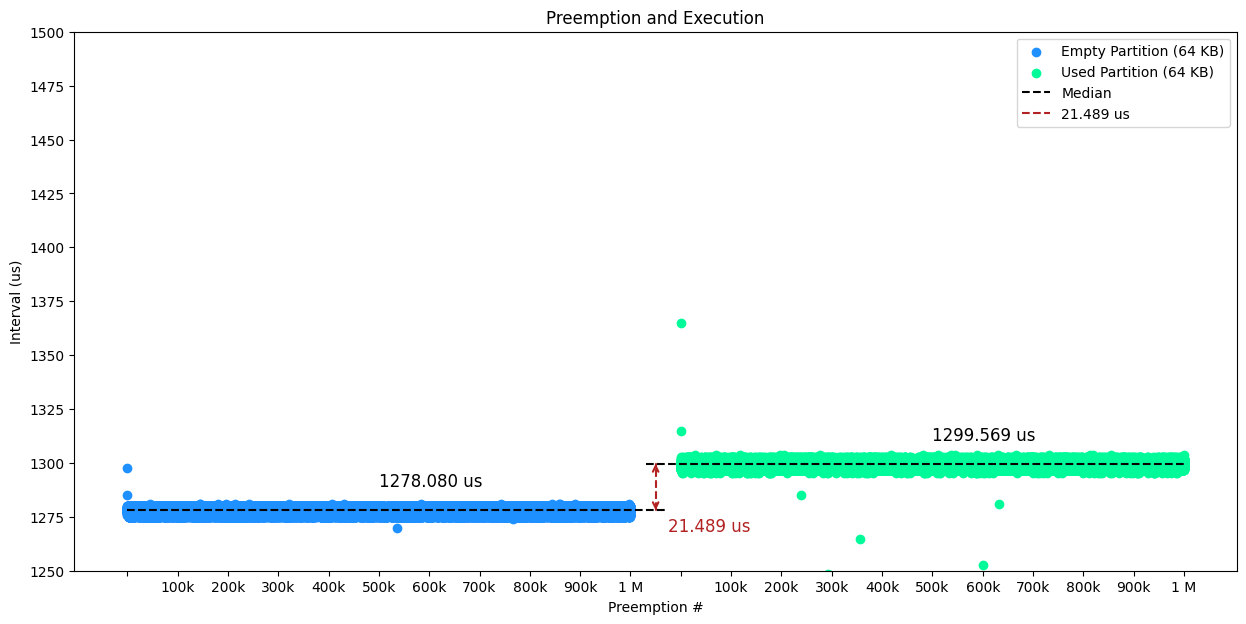

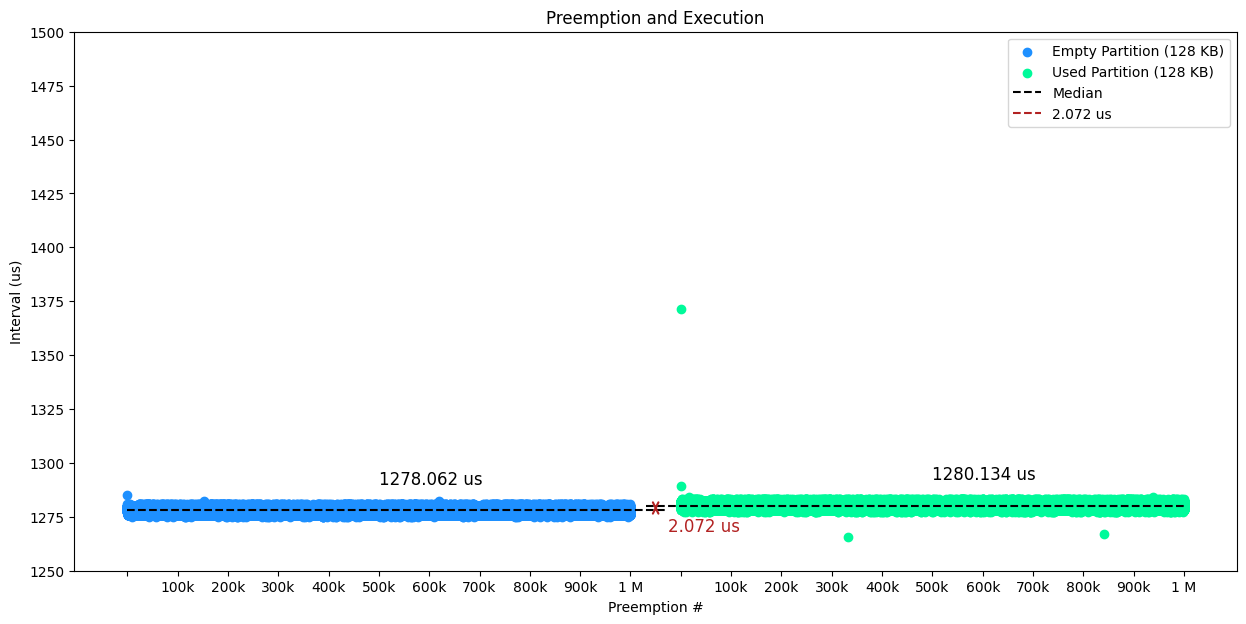

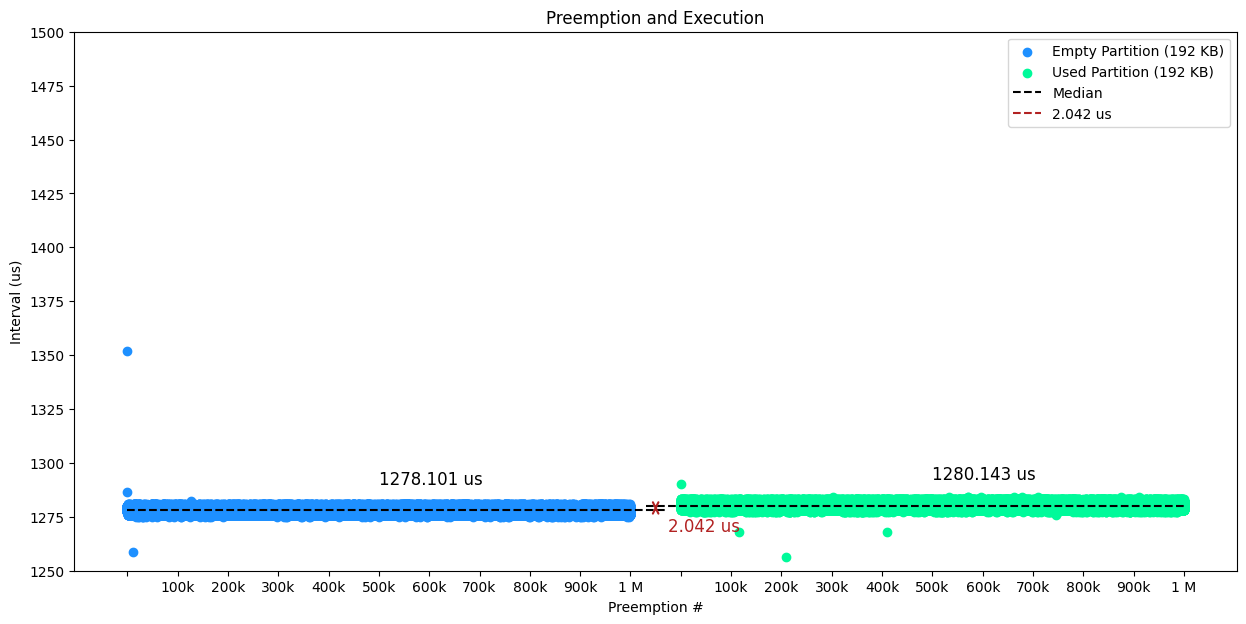

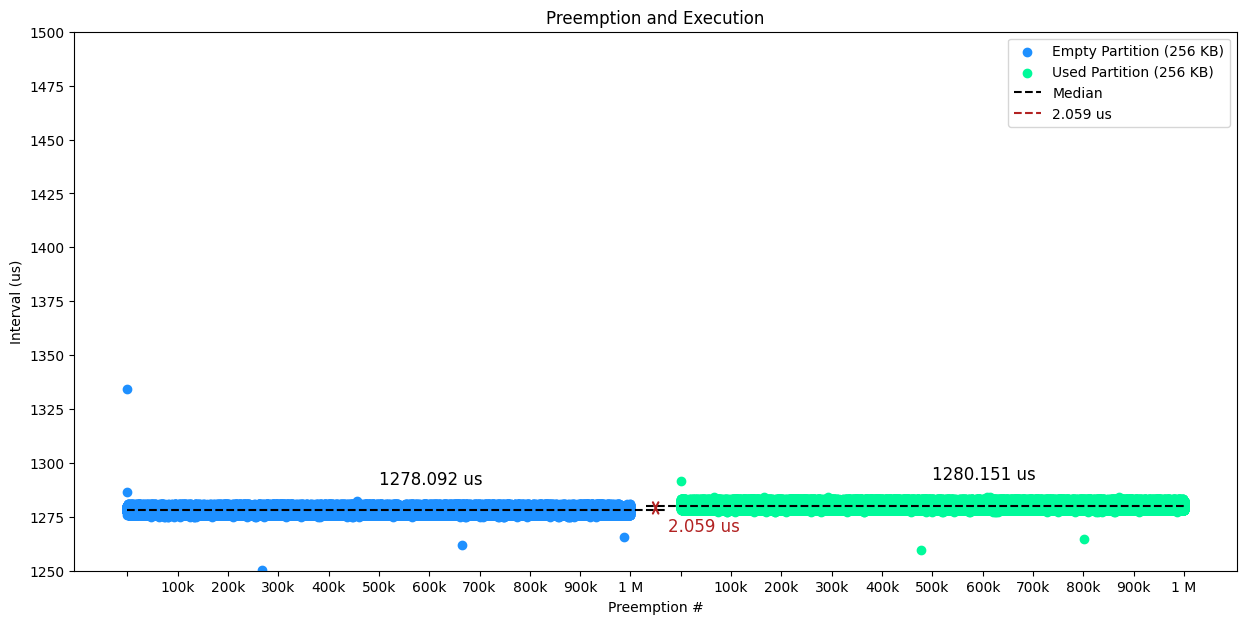

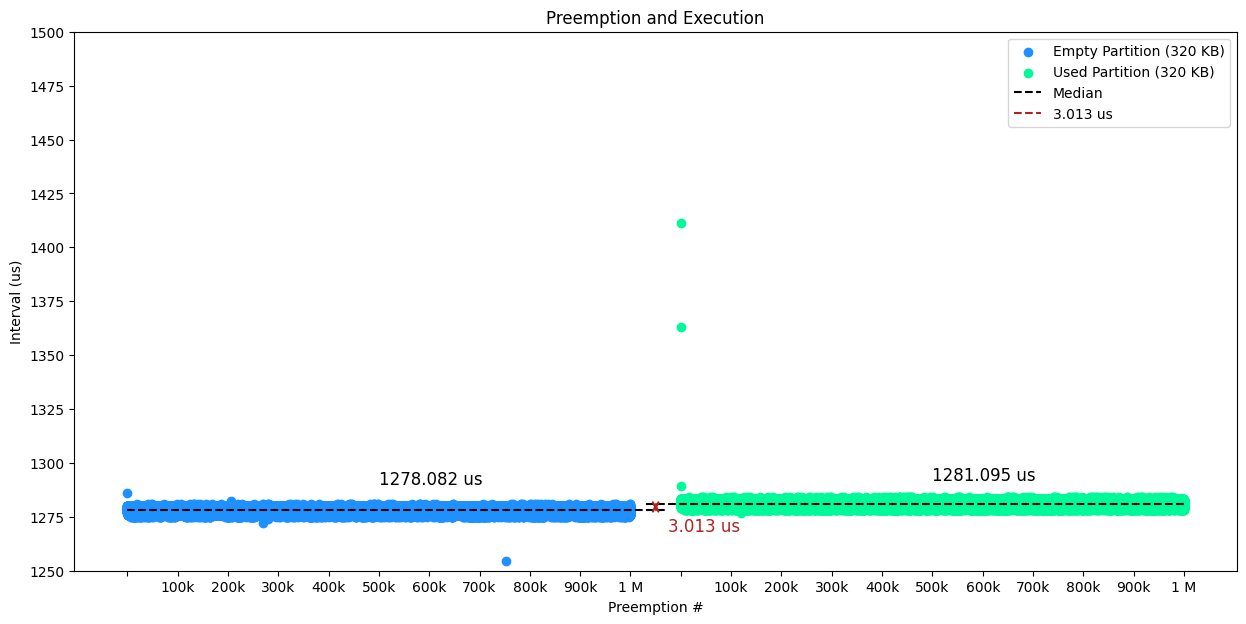

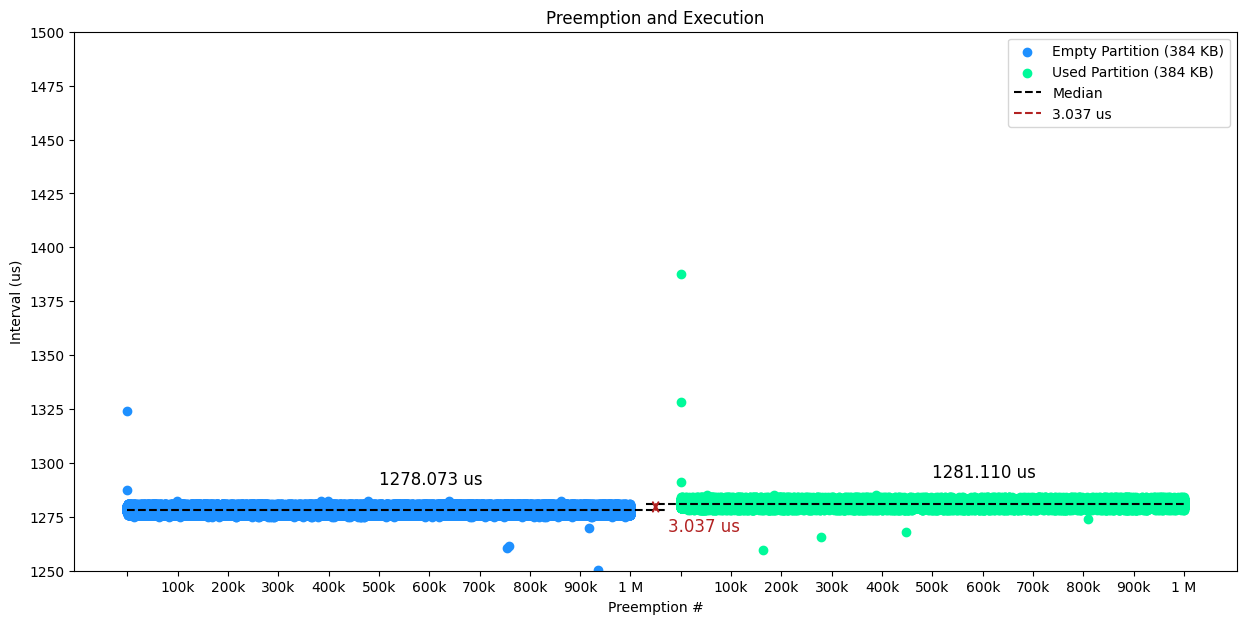

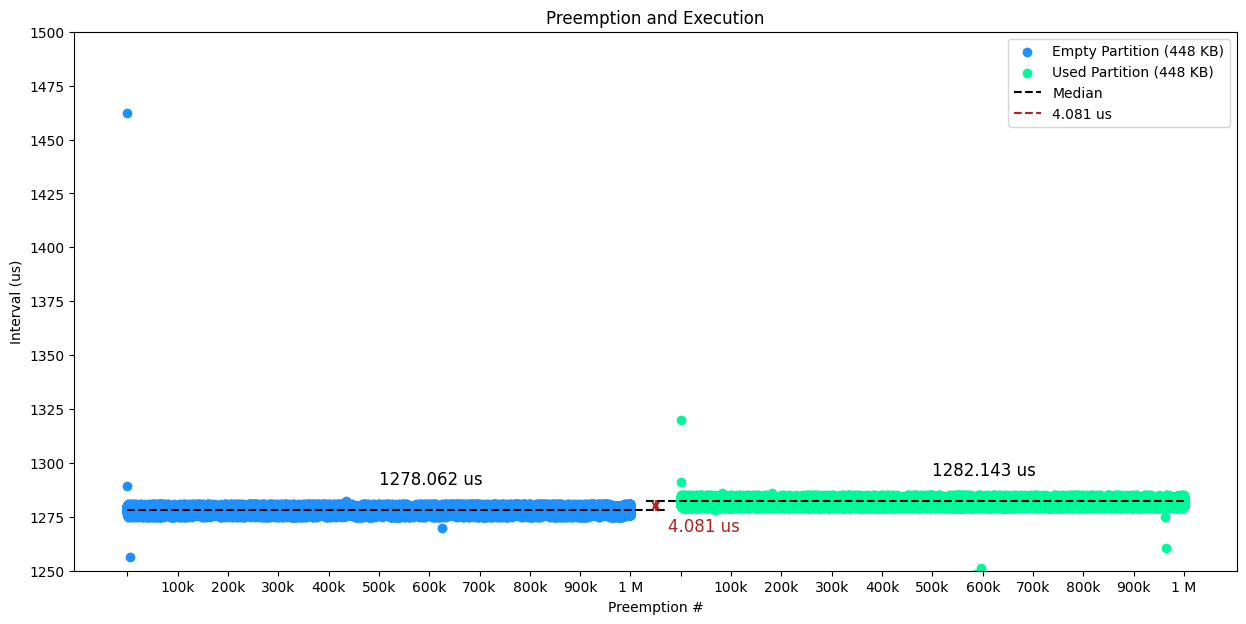

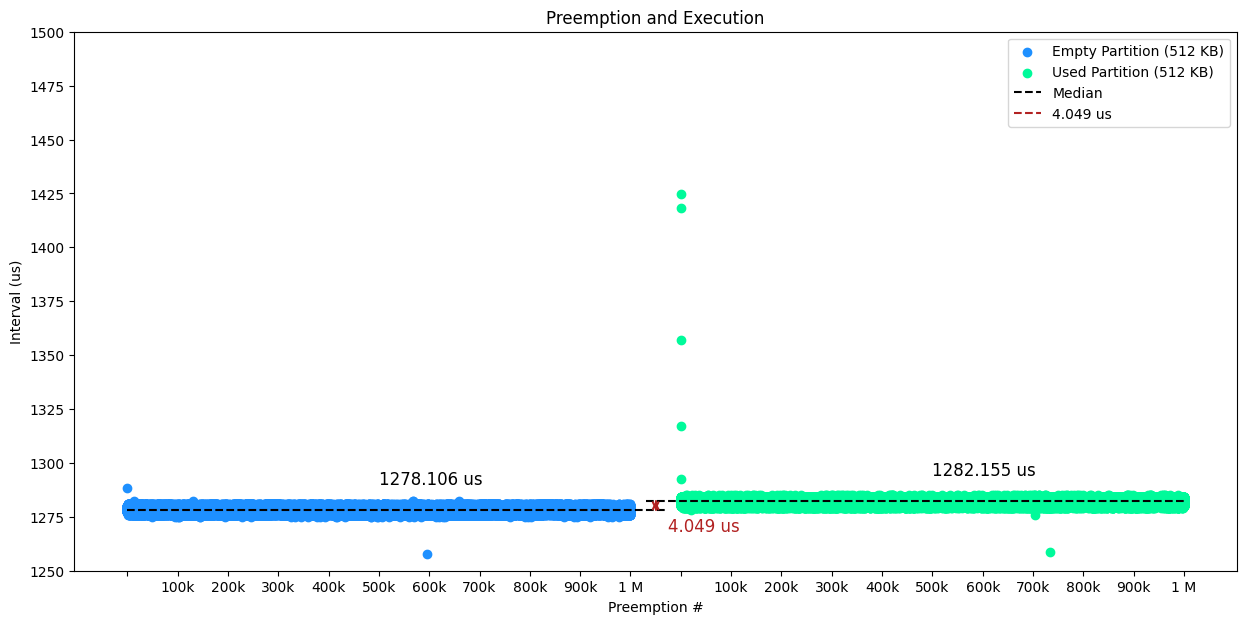

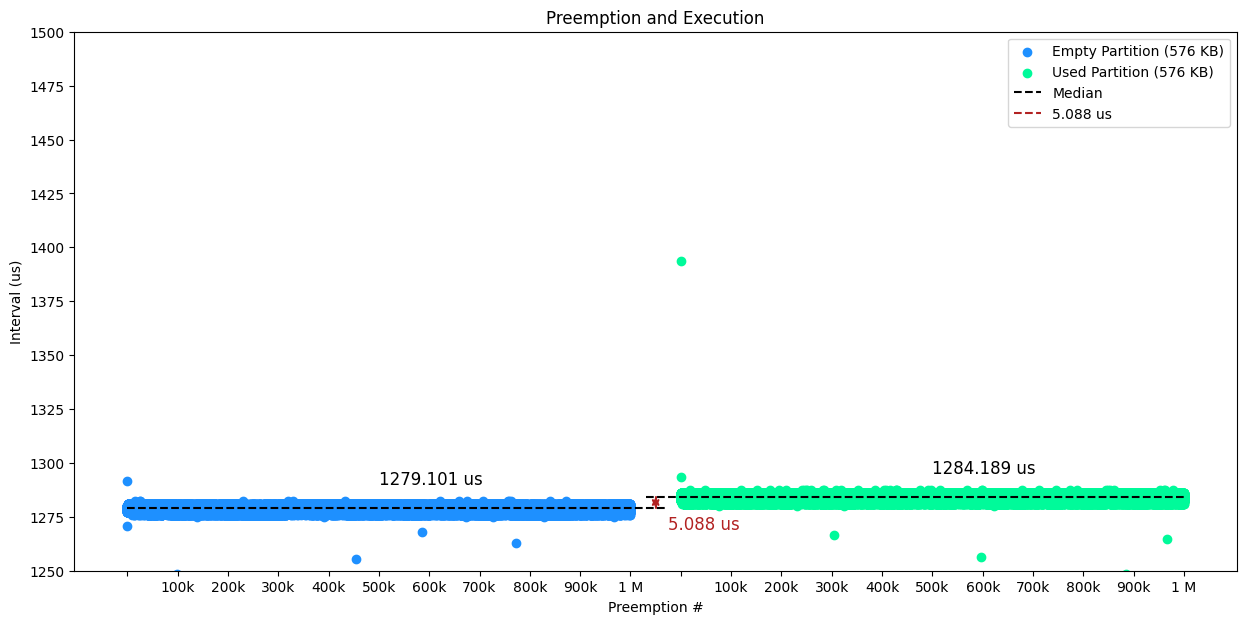

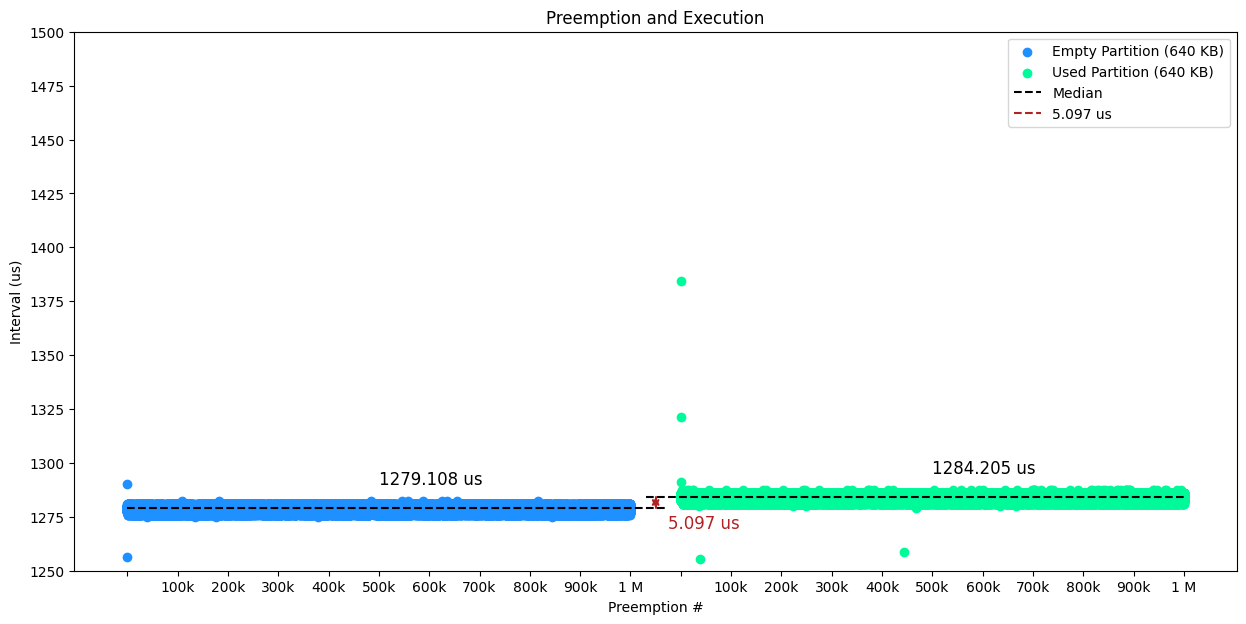

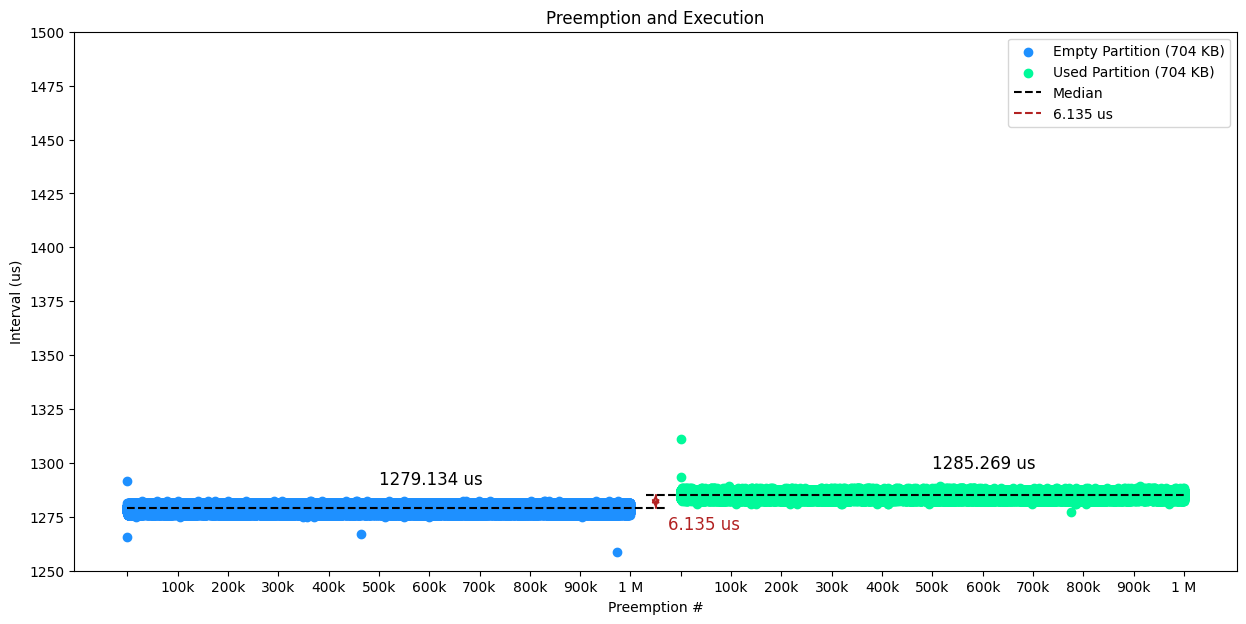

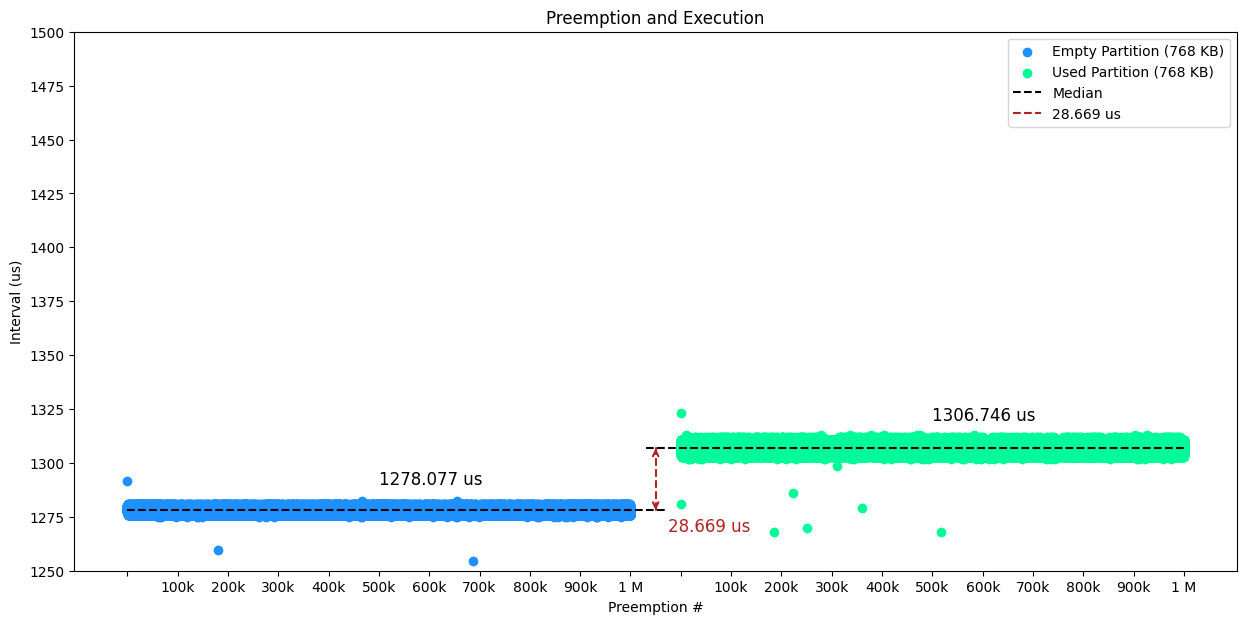

In [3]:
def plot_ivls(left_ivls, right_ivls, left_label=None, right_label=None, 
              right_label_list=None, left_label_list=None, dual=False,):
  NUM_SAMPLES = 1000000
  offset = NUM_SAMPLES // 10
  if right_label_list is None:
    right_label_list = [right_label for i in range(len(right_ivls))]
  if left_label_list is None:
    left_label_list = [left_label for i in range(len(left_ivls))]
  if dual:
    for i, pair in enumerate(zip(left_ivls, right_ivls)):
      plot_side_by_side(noSharedData=pair[0], sharedData=pair[1], NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.5e3, 
                        medianLines=True, offset=offset, firstLabel=left_label_list[i], secondLabel=right_label_list[i])  
  else:
    for i, ivls in enumerate(right_ivls):
      plot_side_by_side(noSharedData=left_ivls, sharedData=ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.5e3, 
                        medianLines=True, offset=offset, firstLabel=left_label_list[i], secondLabel=right_label_list[i])

empty_label_list = [f"Empty Partition ({i} KB)" for i in kb_list]
shared_label_list = [f"Used Partition ({i} KB)" for i in kb_list]
plot_ivls(empty_ivls, shared_ivls, left_label_list=empty_label_list, right_label_list=shared_label_list, dual=True)

# No Memory vs Empty Partition

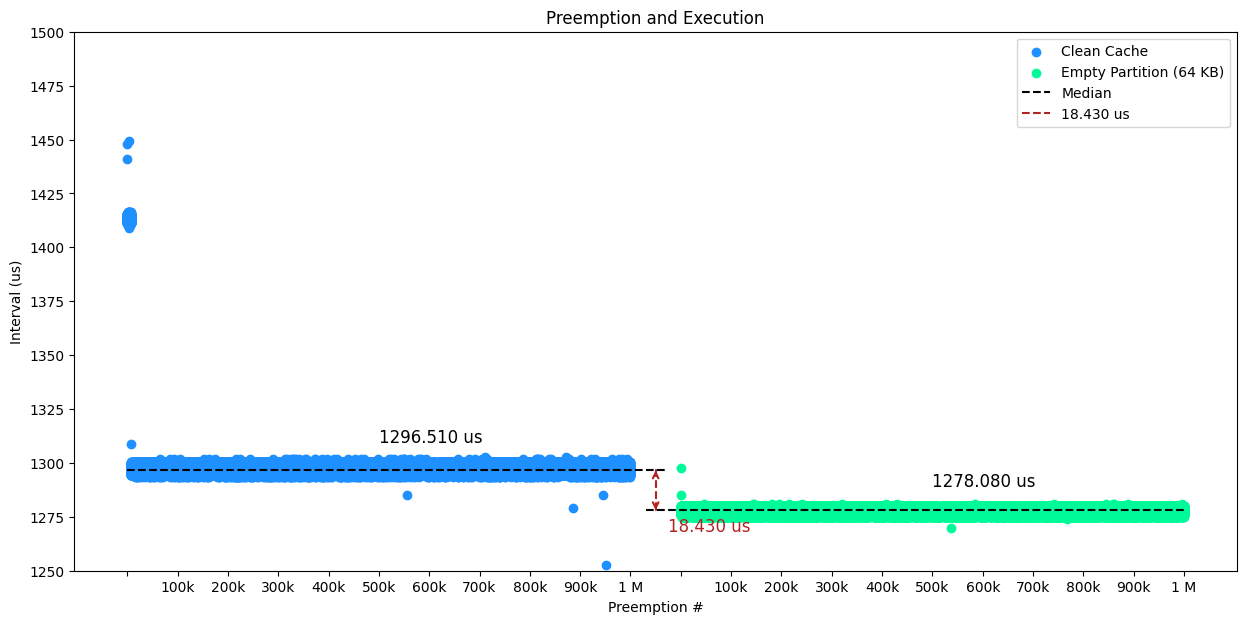

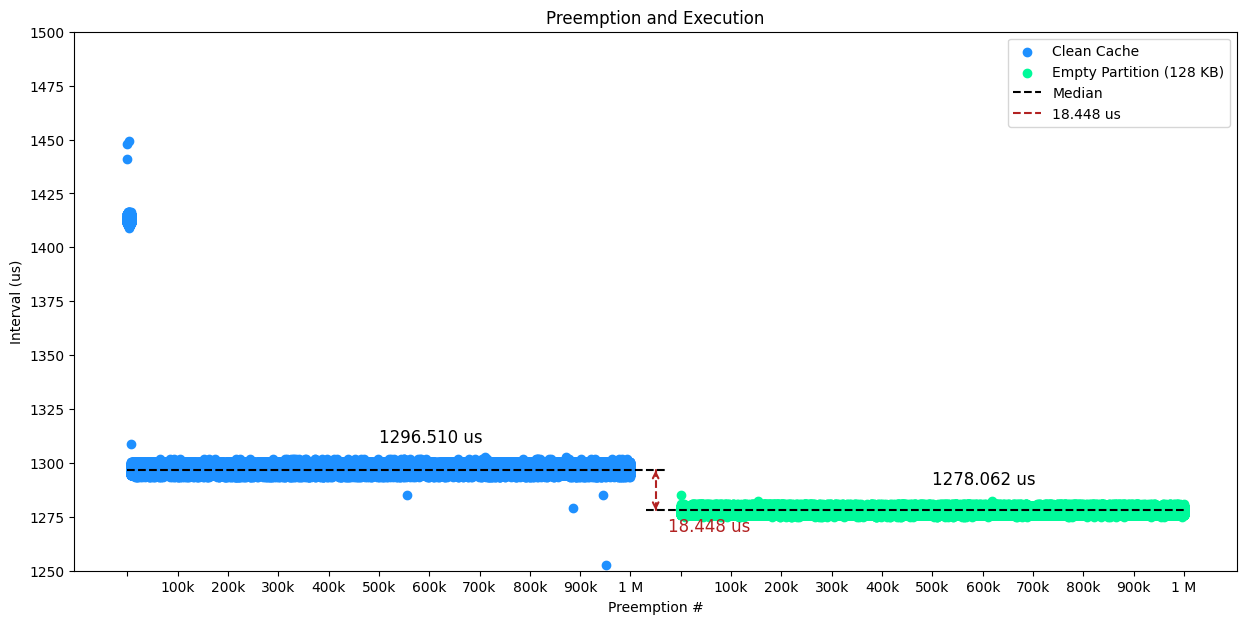

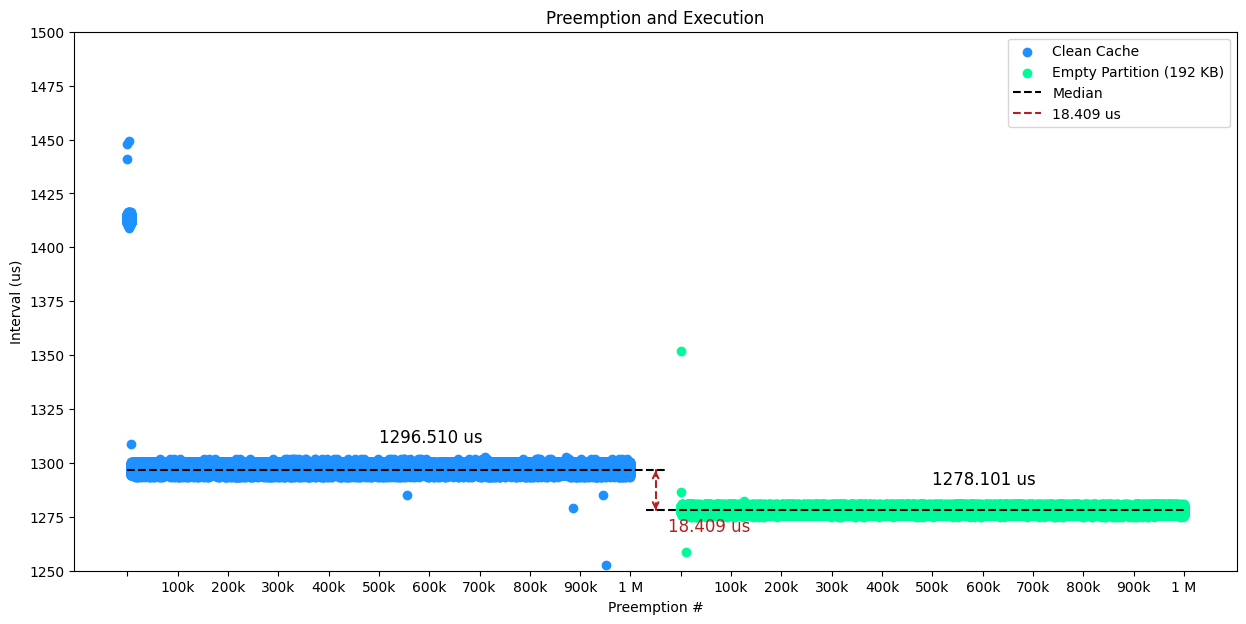

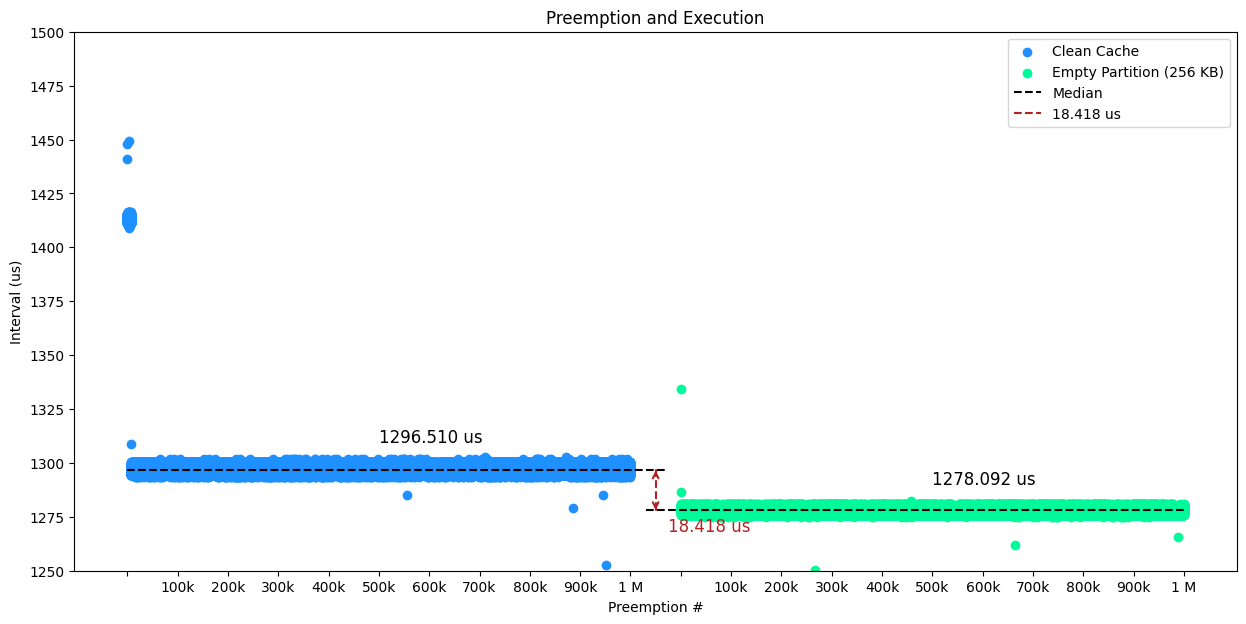

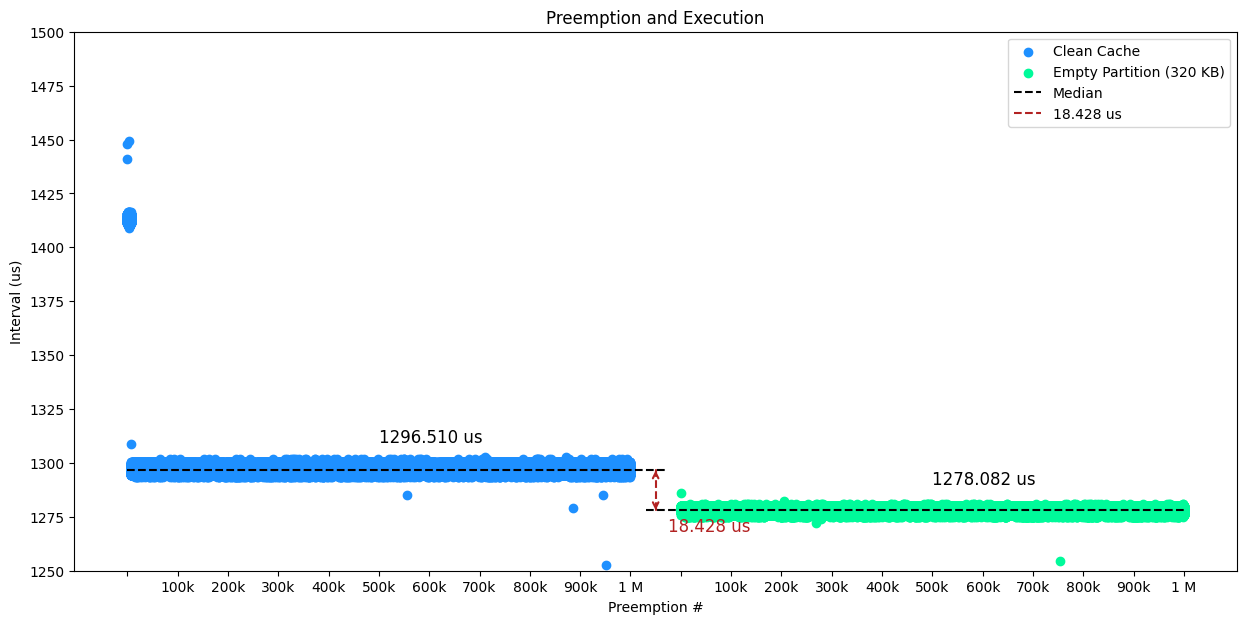

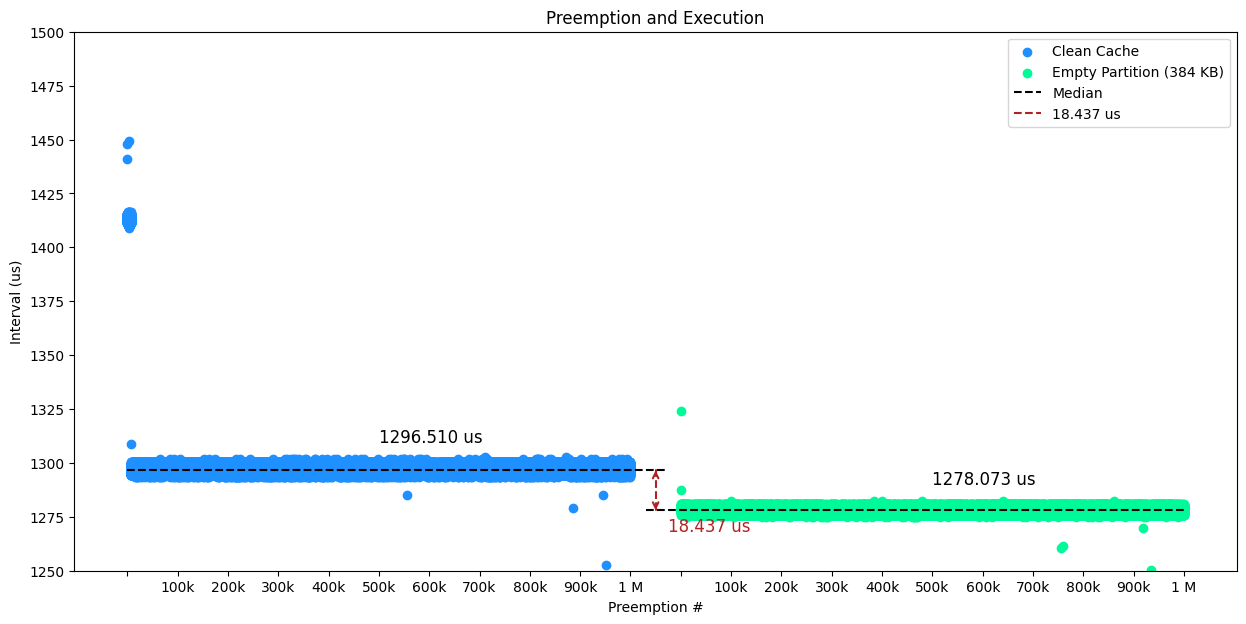

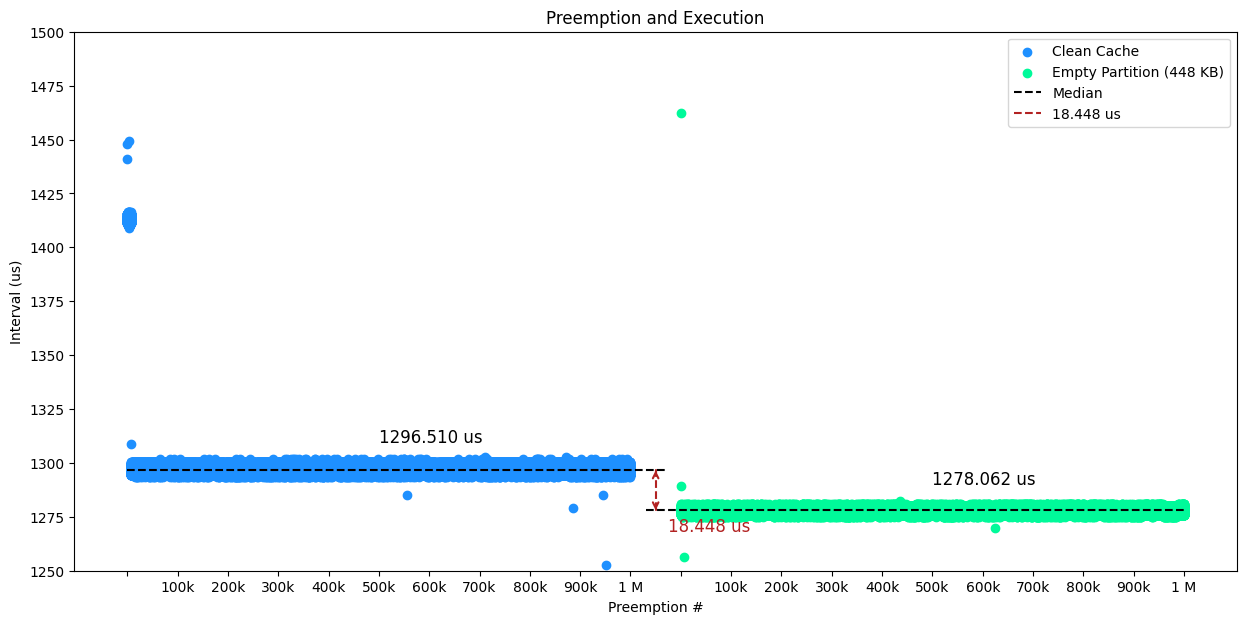

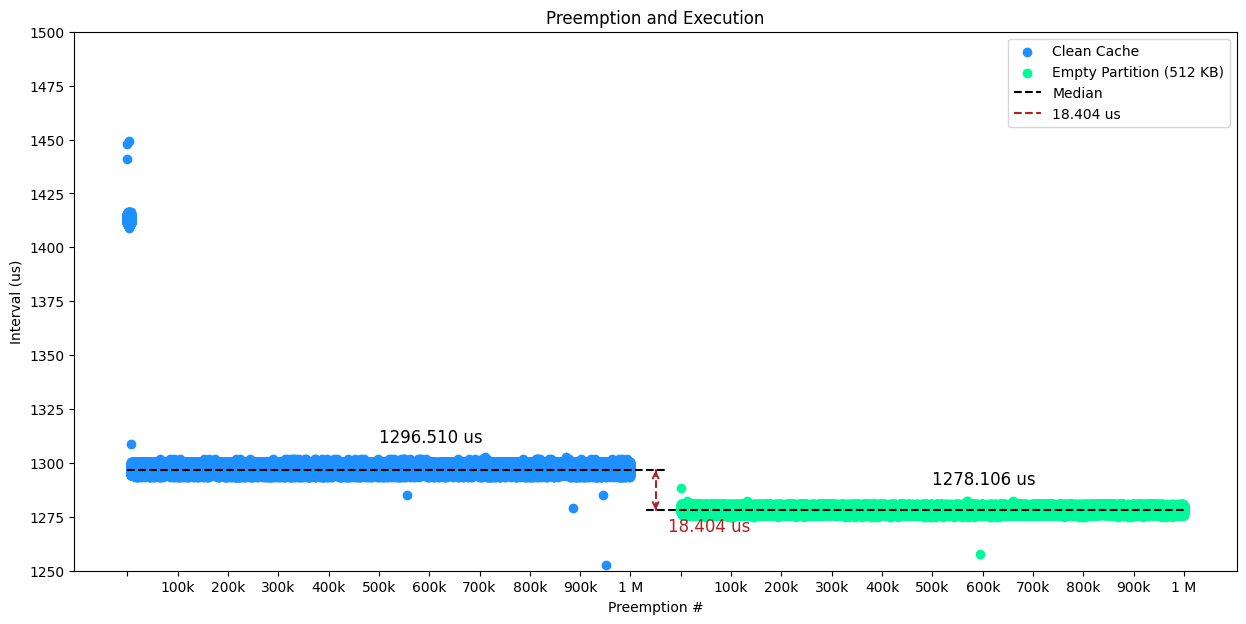

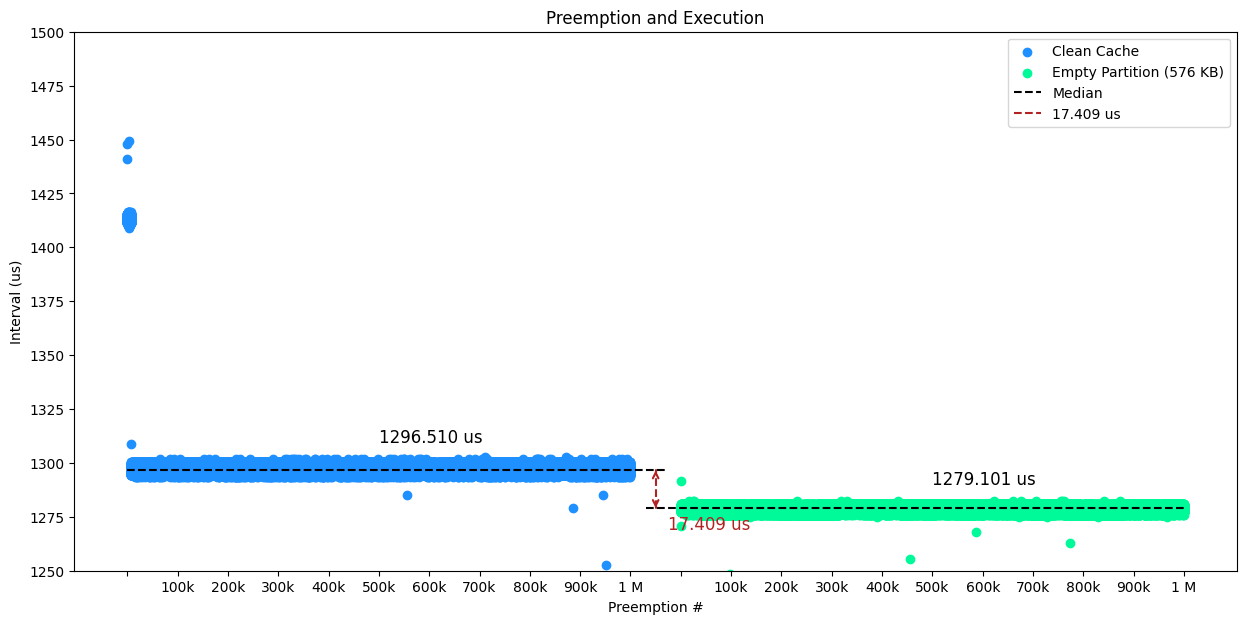

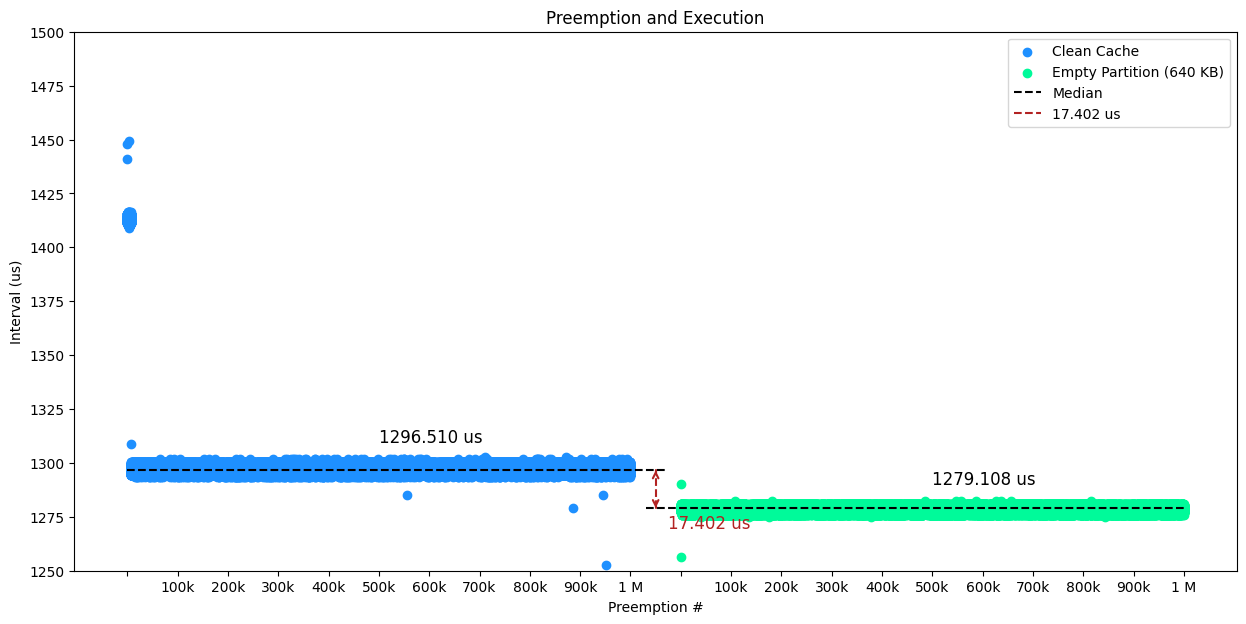

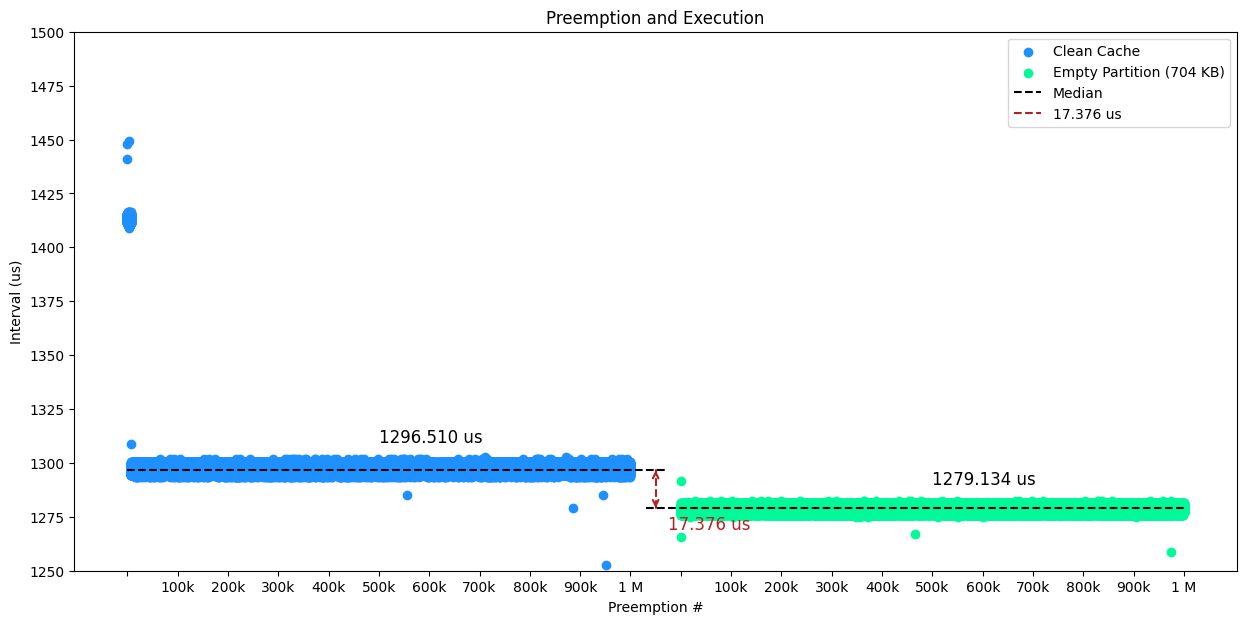

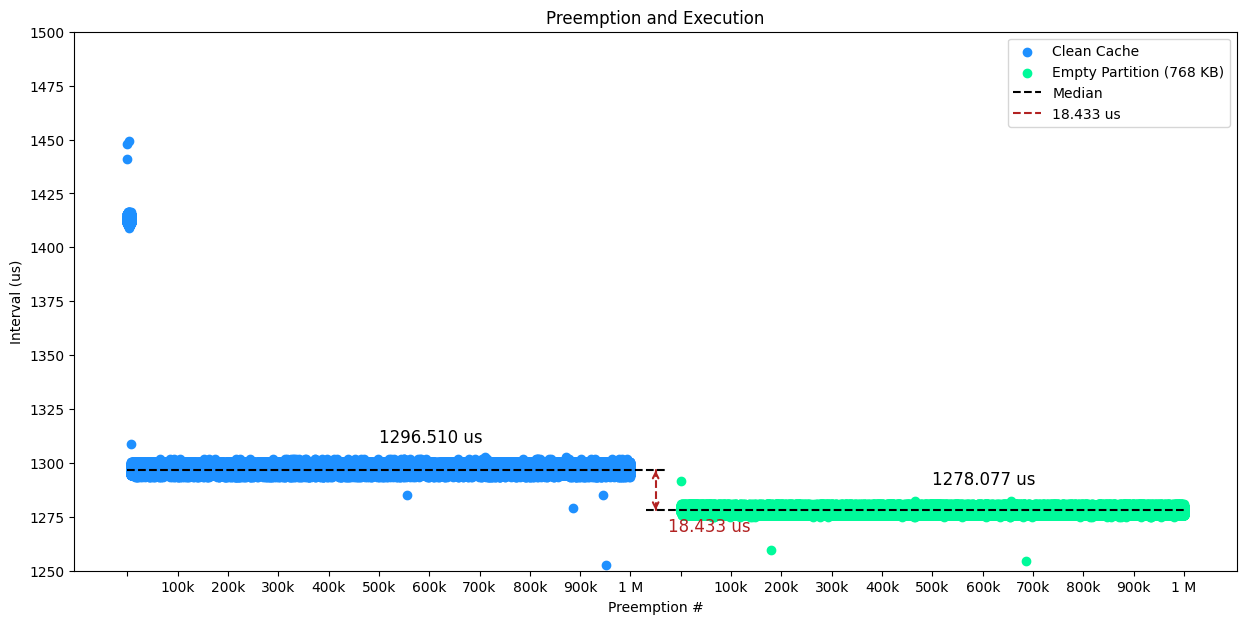

In [4]:
def plot_ivls(left_ivls, right_ivls, left_label, right_label=None, 
              right_label_list=None, dual=False,):
  NUM_SAMPLES = 1000000
  offset = NUM_SAMPLES // 10
  if right_label_list is None:
    right_label_list = [right_label for i in range(len(right_ivls))]
  if dual:
    for i, left, right in enumerate(zip(left_ivls, right_ivls)):
      plot_side_by_side(noSharedData=left, sharedData=right, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.5e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label_list[i])  
  else:
    for i, ivls in enumerate(right_ivls):
      plot_side_by_side(noSharedData=left_ivls, sharedData=ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.5e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label_list[i])

empty_label_list = [f"Empty Partition ({i} KB)" for i in kb_list]
plot_ivls(clean_ivls, empty_ivls, left_label="Clean Cache", right_label_list=empty_label_list)